In [229]:
from DCGAN import DCGAN
import torch
import pytorch_lightning as pl
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from tqdm.auto import tqdm
%matplotlib inline

In [197]:
#250, 150
MODEL_PATH = "./lightning_logs/mnist_dcgan/checkpoints/epoch250.ckpt"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [198]:
model = DCGAN()
model = model.load_from_checkpoint(MODEL_PATH).to(device)
model.eval()

DCGAN(
  (generator): Generator(
    (fc): Sequential(
      (0): Linear(in_features=100, out_features=16384, bias=True)
      (1): BatchNorm1d(16384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
    )
    (fc2): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.2, inplace=True)
      (3): ConvTranspose2d(512, 256, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1), bias=False)
      (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): LeakyReLU(negative_slope=0.2, inplace=True)
      (6): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1), bias=False)
      (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): LeakyReLU(negative_

0


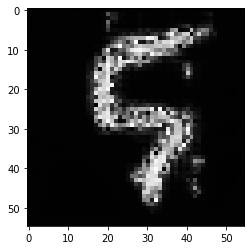

1


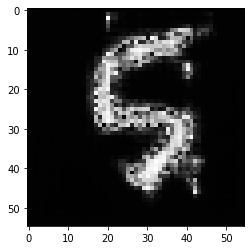

2


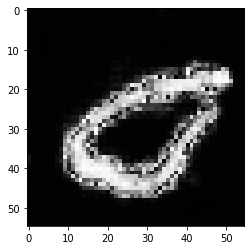

3


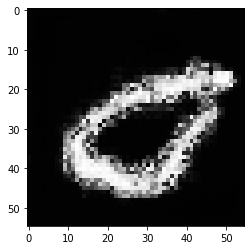

4


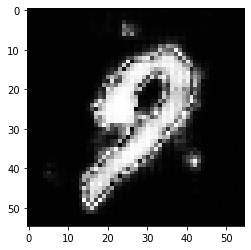

5


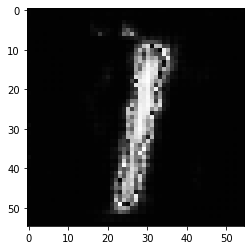

6


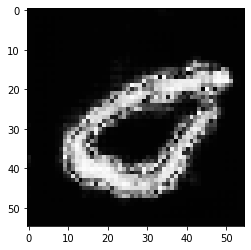

7


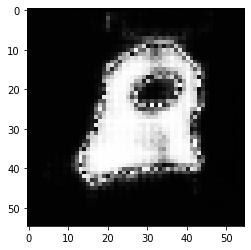

8


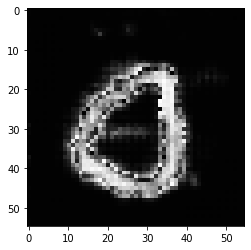

9


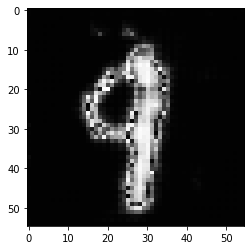

10


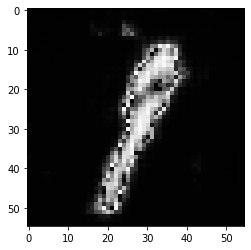

11


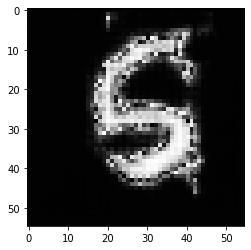

12


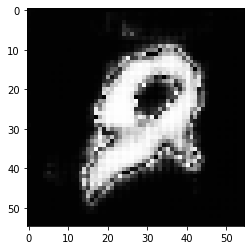

13


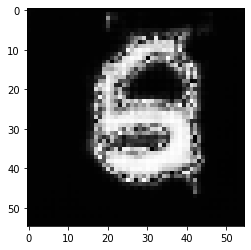

14


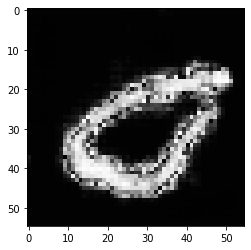

15


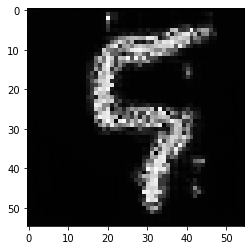

16


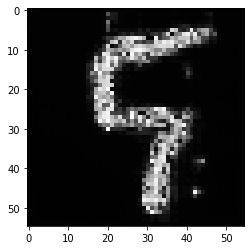

17


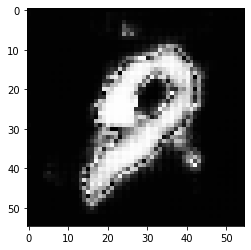

18


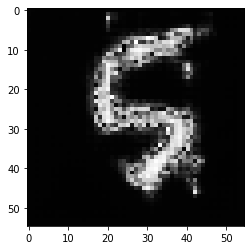

19


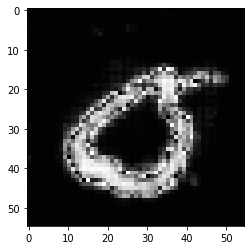

20


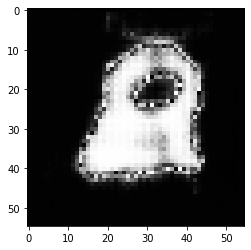

21


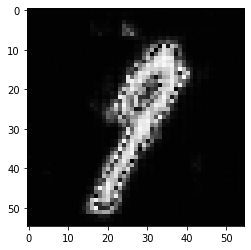

22


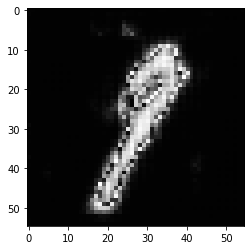

23


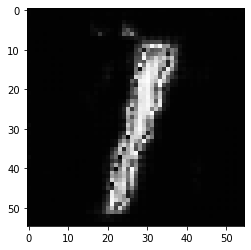

24


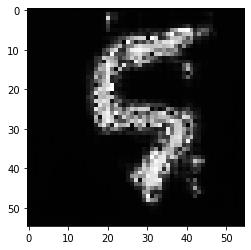

25


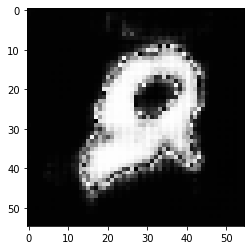

26


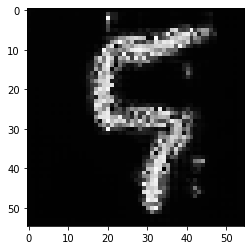

27


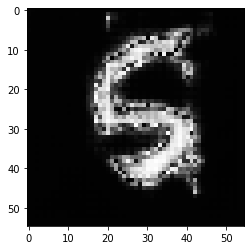

28


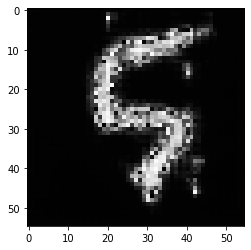

29


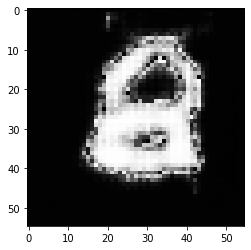

30


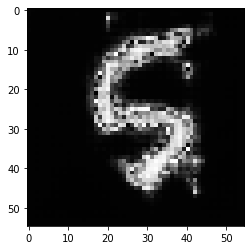

31


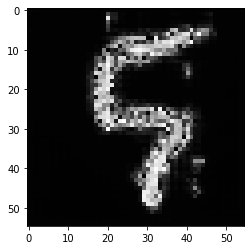

32


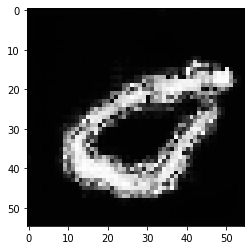

33


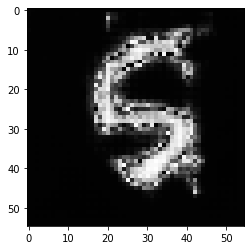

34


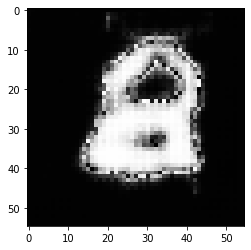

35


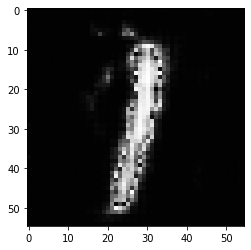

36


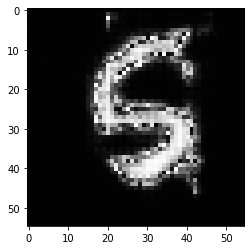

37


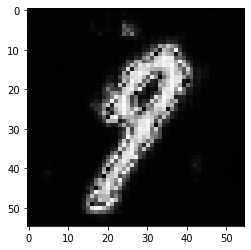

38


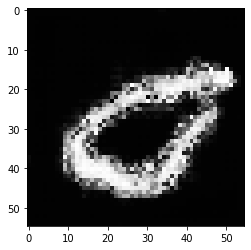

39


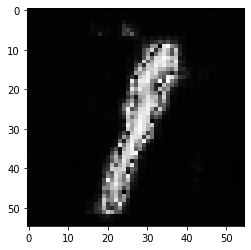

40


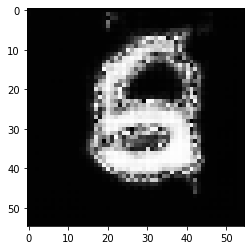

41


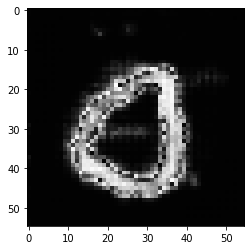

42


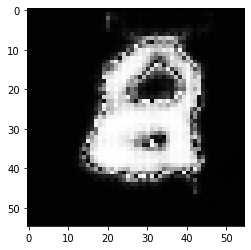

43


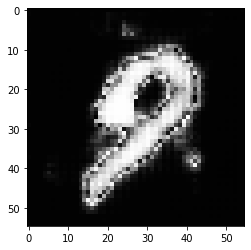

44


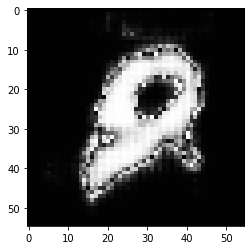

45


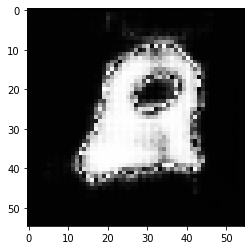

46


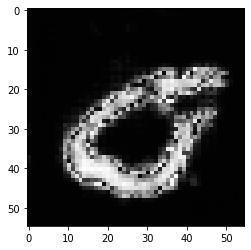

47


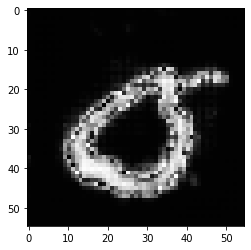

48


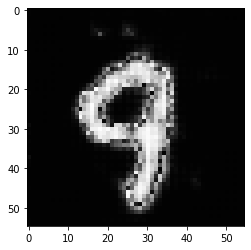

49


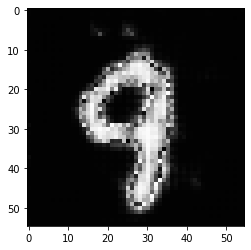

50


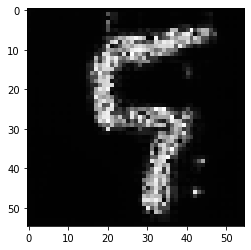

51


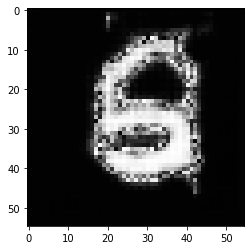

52


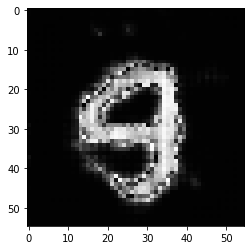

53


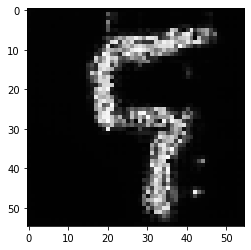

54


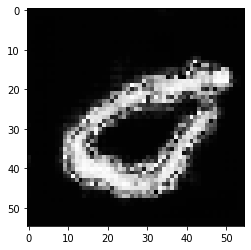

55


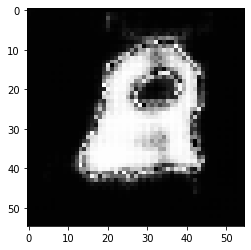

56


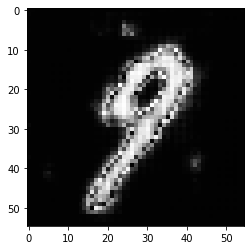

57


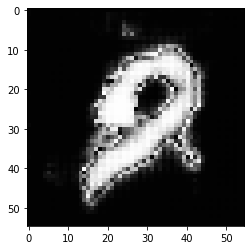

58


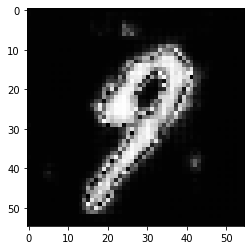

59


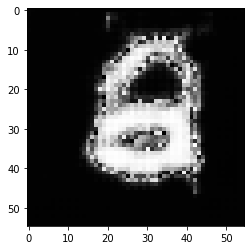

60


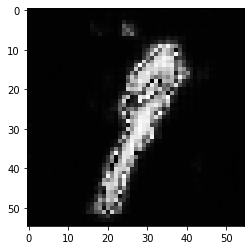

61


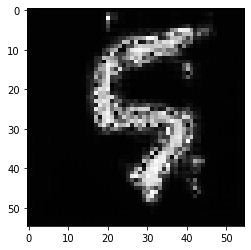

62


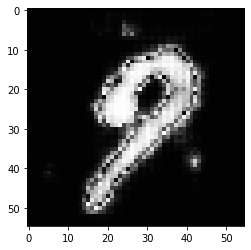

63


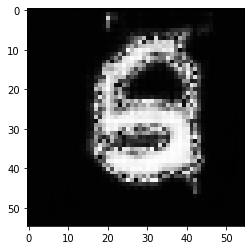

64


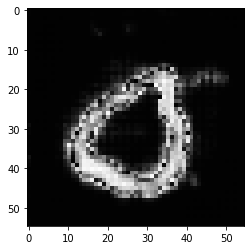

65


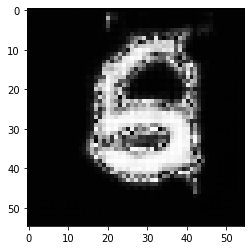

66


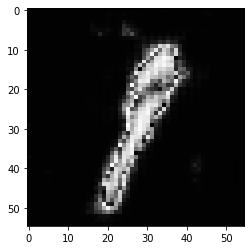

67


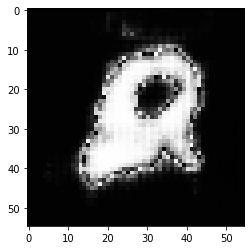

68


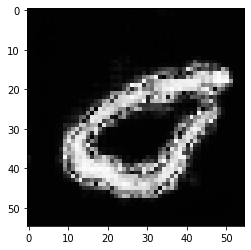

69


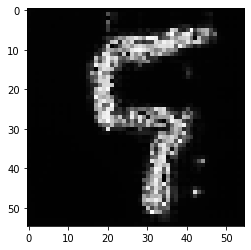

70


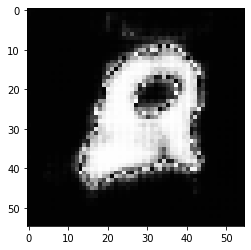

71


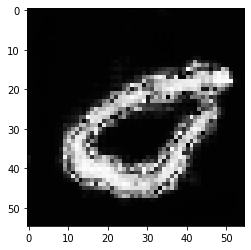

72


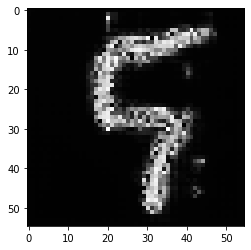

73


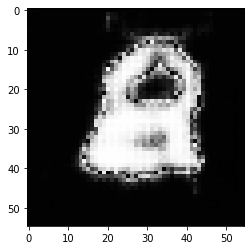

74


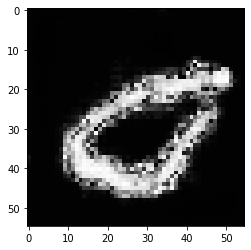

75


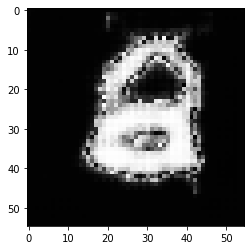

76


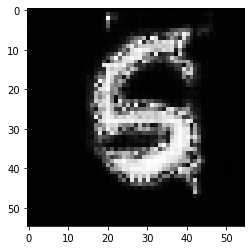

77


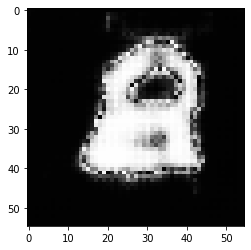

78


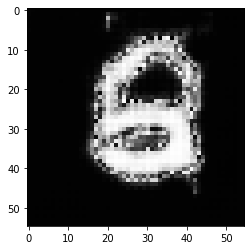

79


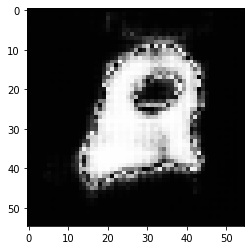

80


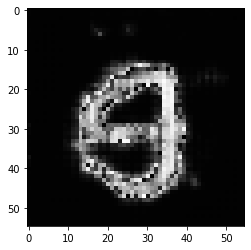

81


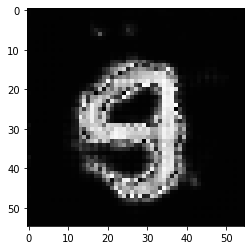

82


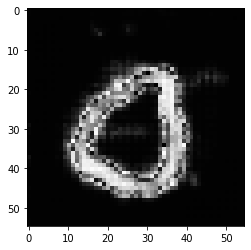

83


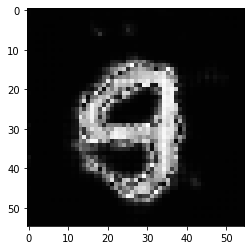

84


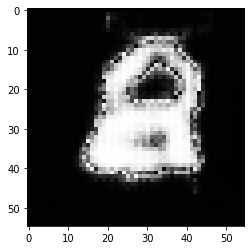

85


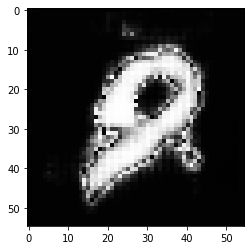

86


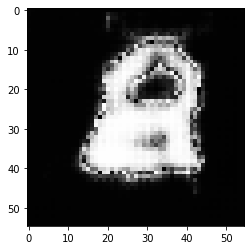

87


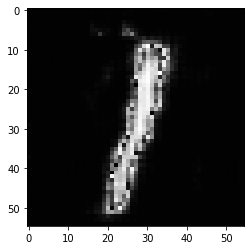

88


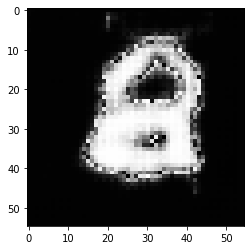

89


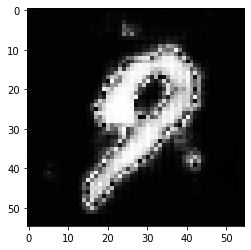

90


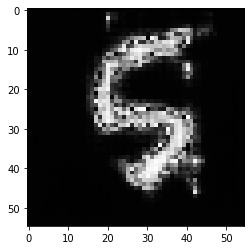

91


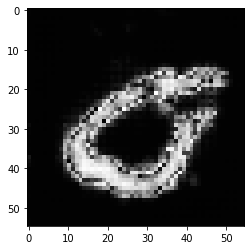

92


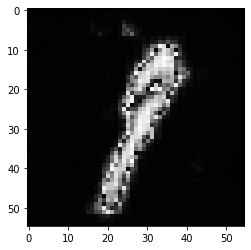

93


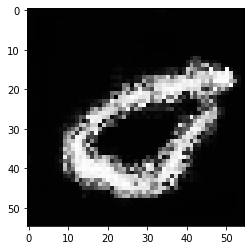

94


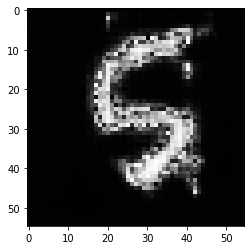

95


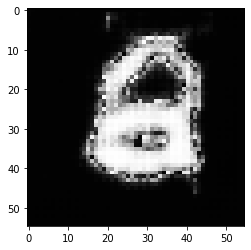

96


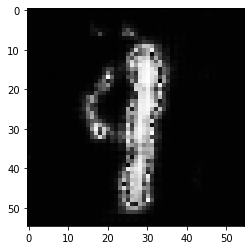

97


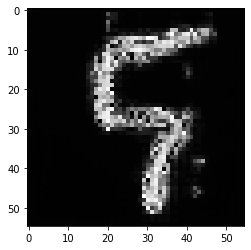

98


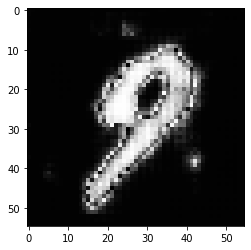

99


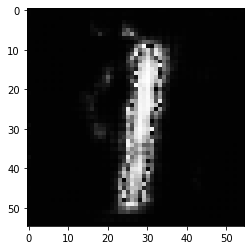

100


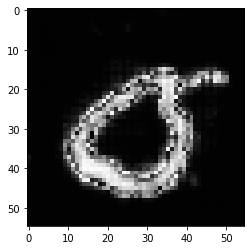

101


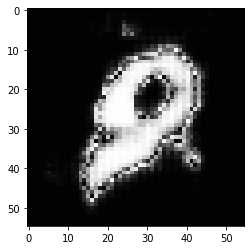

102


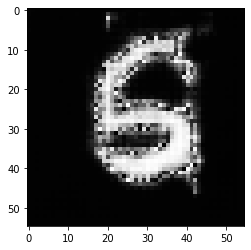

103


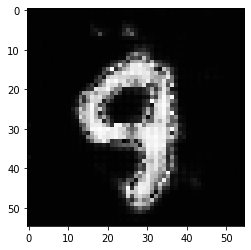

104


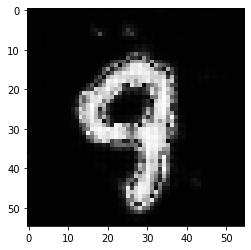

105


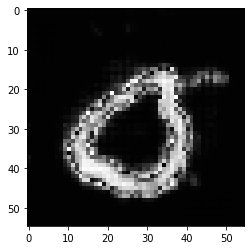

106


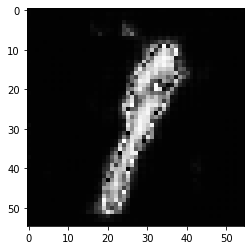

107


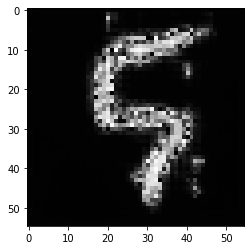

108


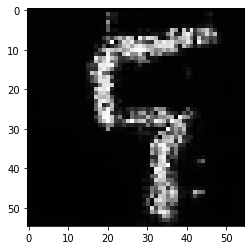

109


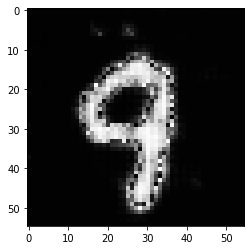

110


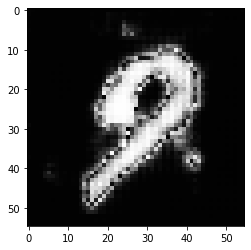

111


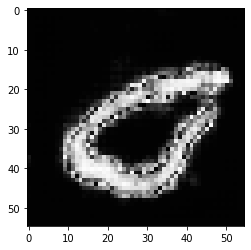

112


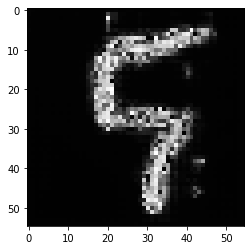

113


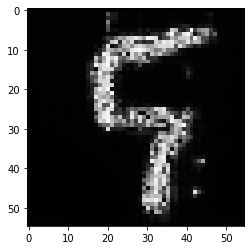

114


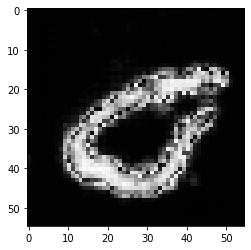

115


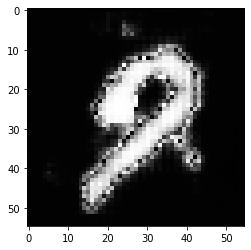

116


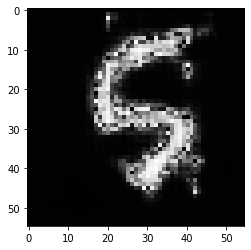

117


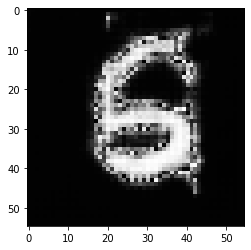

118


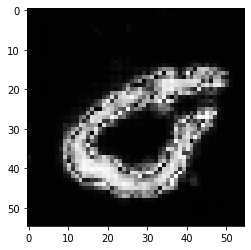

119


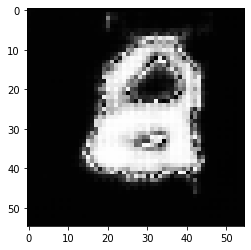

120


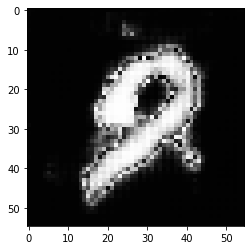

121


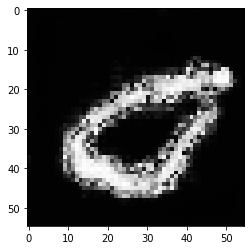

122


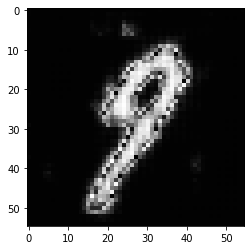

123


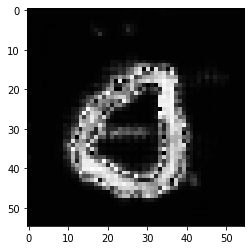

124


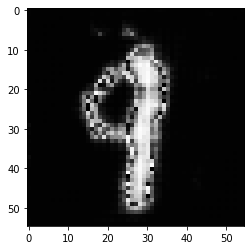

125


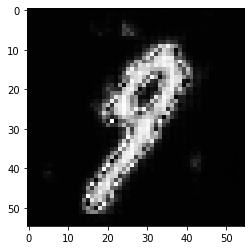

126


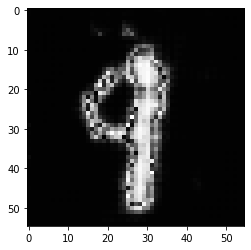

127


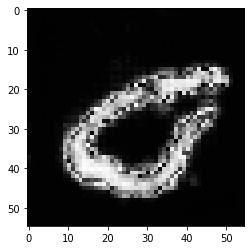

128


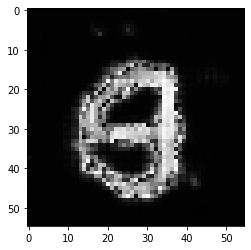

129


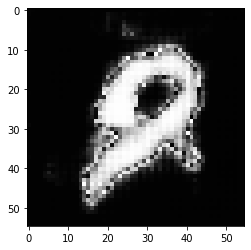

130


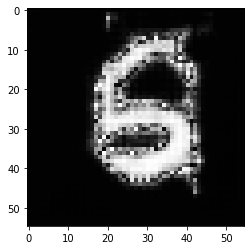

131


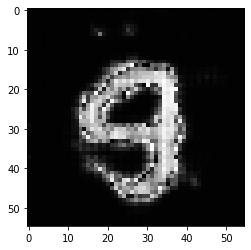

132


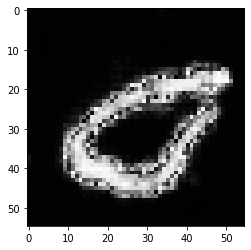

133


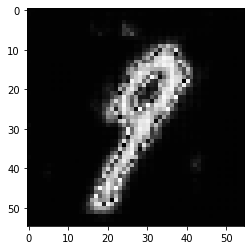

134


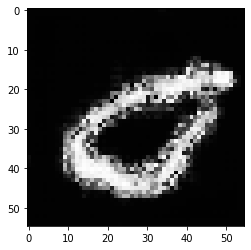

135


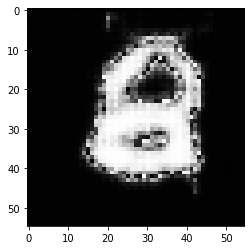

136


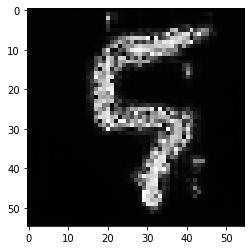

137


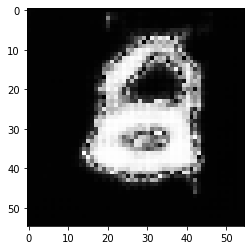

138


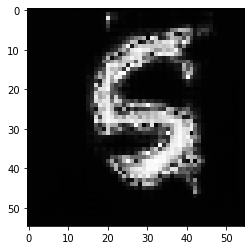

139


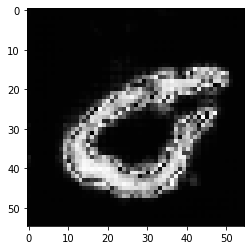

140


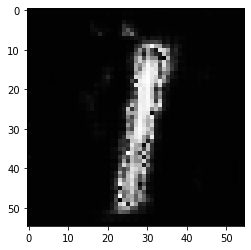

141


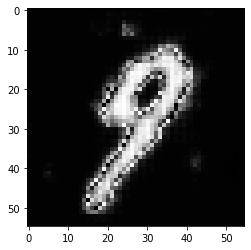

142


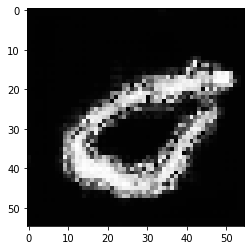

143


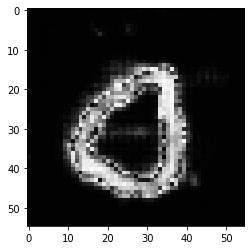

144


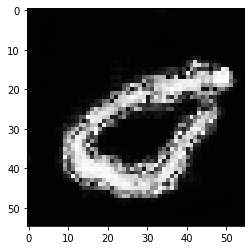

145


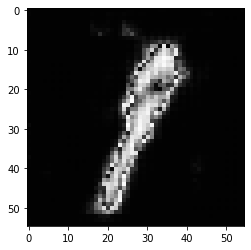

146


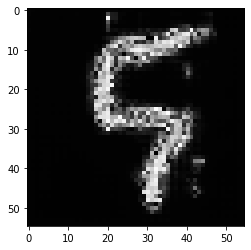

147


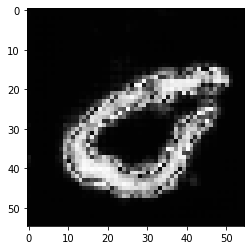

148


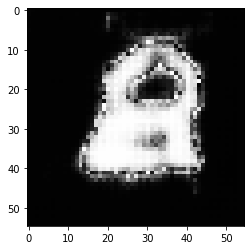

149


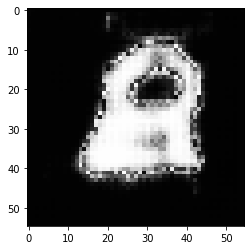

150


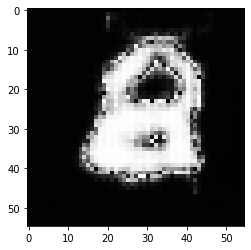

151


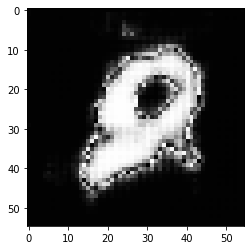

152


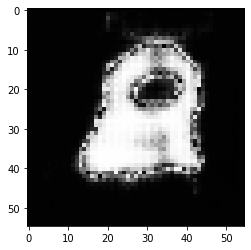

153


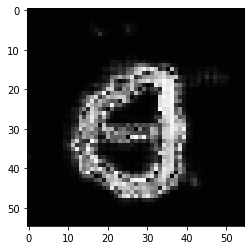

154


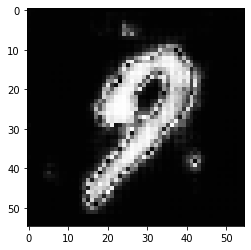

155


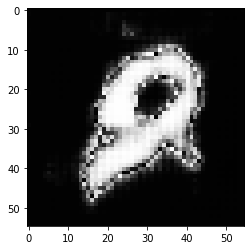

156


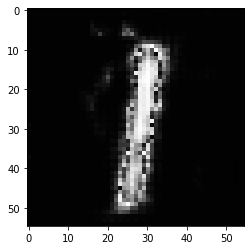

157


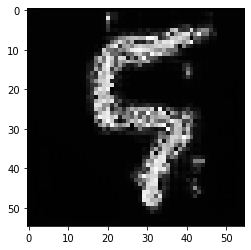

158


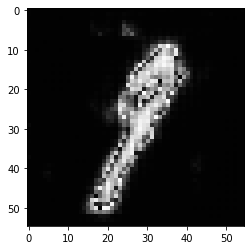

159


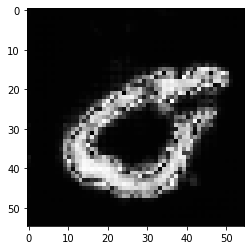

160


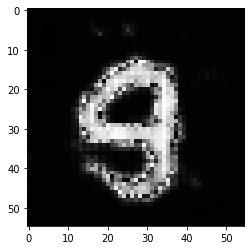

161


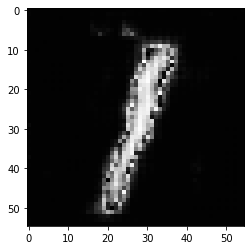

162


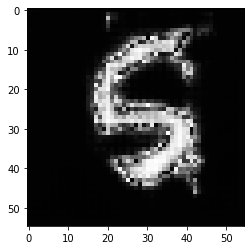

163


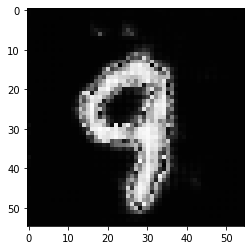

164


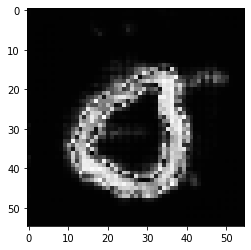

165


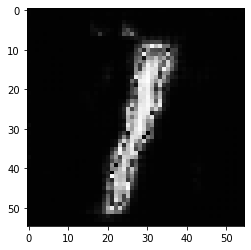

166


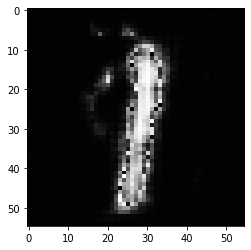

167


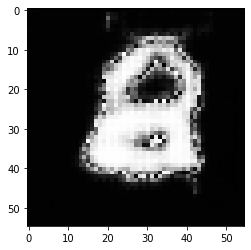

168


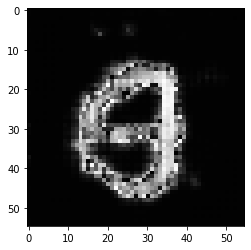

169


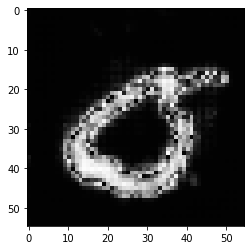

170


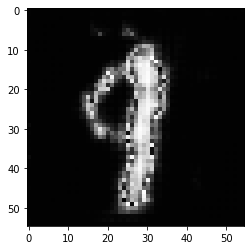

171


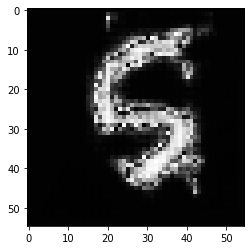

172


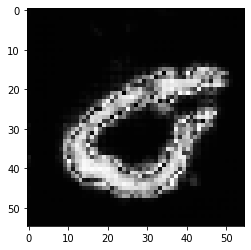

173


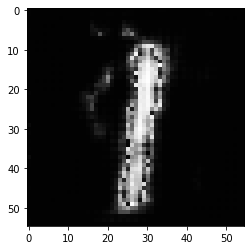

174


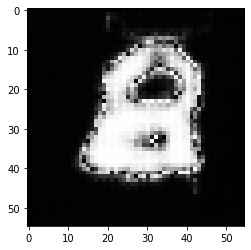

175


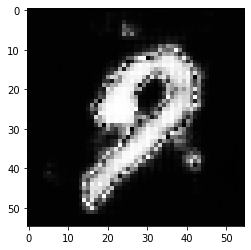

176


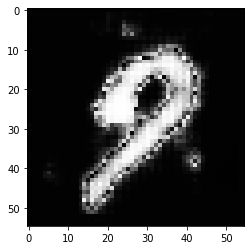

177


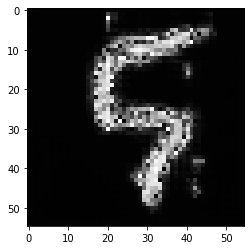

178


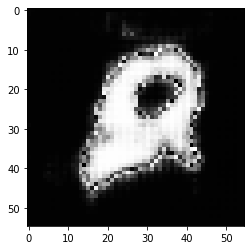

179


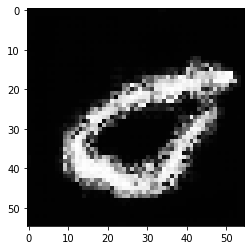

180


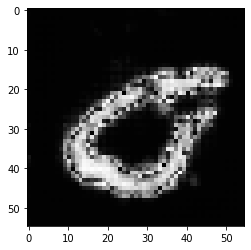

181


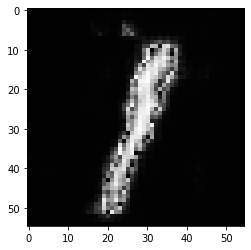

182


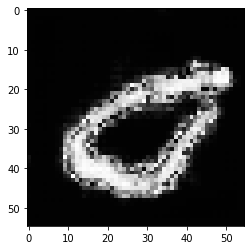

183


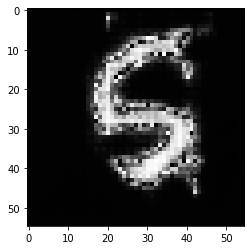

184


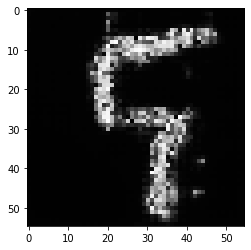

185


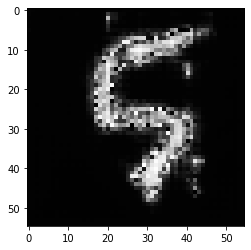

186


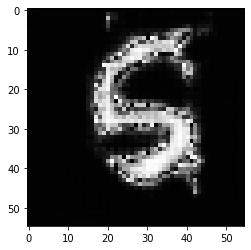

187


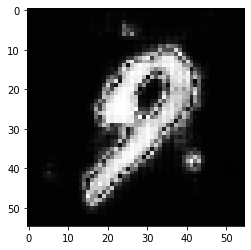

188


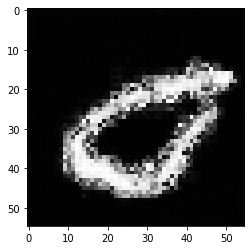

189


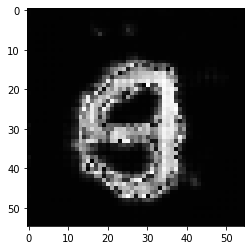

190


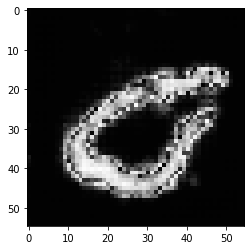

191


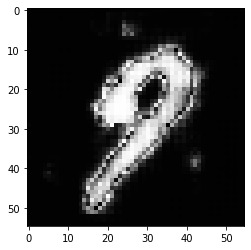

192


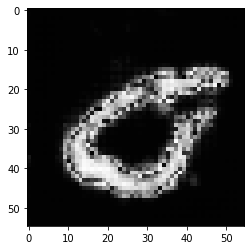

193


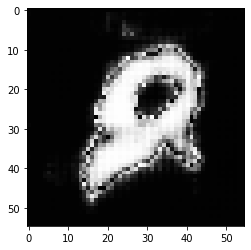

194


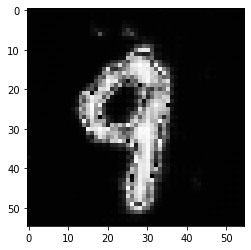

195


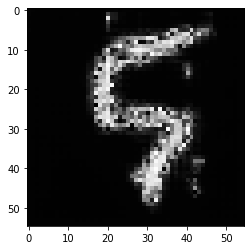

196


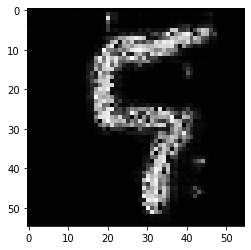

197


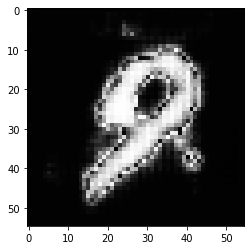

198


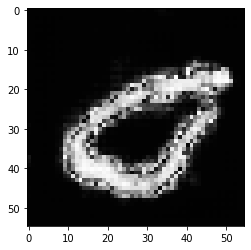

199


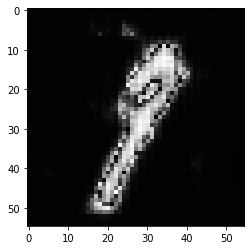

In [202]:
vectors = []
for i in range(200):
    z = torch.randn((1,100)).to(device)
    vectors.append(z)
    img = model.generate(z)
    img = transforms.ToPILImage()(img).convert("RGB")
    print (i)
    plt.imshow(img)
    plt.show()

In [247]:
mapping = {
    0: 5,
    164: 0,
    4: 9,
    99: 1,
    29: 8,
    102: 6,
}

In [265]:
indices = [99, 0, 29, 99]

In [270]:
images = []

for i in tqdm(range(1, len(indices))):
    src = vectors[indices[i-1]]
    tgt = vectors[indices[i]]
                 
    size = 40
    for j in range(size):
        step = (tgt - src) / size
        h = src + (step * j)
        img = model.generate(h)
        img = transforms.ToPILImage()(img).convert("RGB")
        images.append(img)
#         plt.imshow(img)
#         plt.show()

In [272]:
images[0].save('./mnist.gif',
               save_all=True, append_images=images[1:], optimize=False, duration=70, loop=0)